# Homework 3 #

Create the dataset.  <br/>
Separate variables and target - "quality".

In [28]:
import pandas as pd
# Reading the csv file
df = pd.read_csv('winequality-red.csv')
# Separating the variables from the target
variables = df.drop("quality", axis= 1)
target = df['quality']

Do a 80-20 train-test split using a fixed seed.

In [29]:
from sklearn.model_selection import train_test_split
# Training Test Split
variables_train, variables_test, target_train, target_test= train_test_split(variables, target, 
                                                                         train_size=0.8, stratify=target, random_state=0)

### Exercise 1 ##

Learn 10 MLP regressors with the parameters specified but with different seeds (from 1 to 10). Calculate residues and save them in an array.

In [ ]:
import numpy as np
from sklearn.neural_network import MLPRegressor

######### Exercise 1 ##########

residues = np.array([])

for i in range(1, 11):
    # Learn the MLP regressor 
    mlp = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', early_stopping=True, validation_fraction=0.2, random_state=i)
    #Predict output
    y_pred = mlp.fit(variables_train,target_train).predict(variables_test)
    #Calculate residues
    residue = abs(target_test - y_pred)
    residue = residue.to_numpy()
    residues = np.append(residues, residue)

Plot the residues using an histogram.

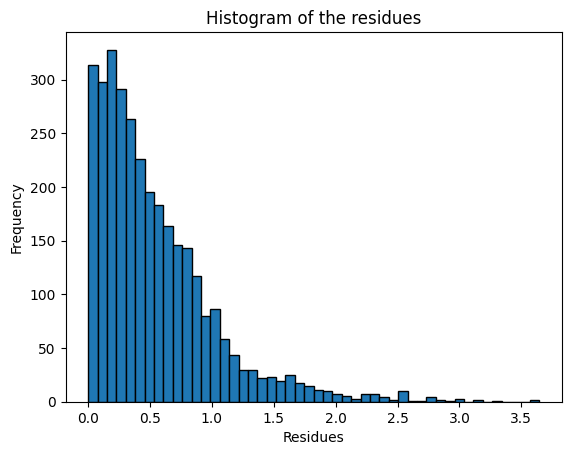

In [94]:
import matplotlib.pyplot as plt

#Plot all the residues
plt.hist(residues, edgecolor='black',bins='auto')
plt.title('Histogram of the residues')
plt.xlabel('Residues')
plt.ylabel('Frequency')
plt.savefig('ex1_histogram.png')
plt.show()

### Exercise 2 ###

Round the predicted output to the nearest integer and bound it between [0,10]. 

In [88]:
# Round and bound the predictions
rounded_predictions = np.round(y_pred)
rounded_and_bounded_predictions = np.clip(rounded_predictions,0,10)

Calculate both the previous and the new Mean Absolute Error and compare them.

In [89]:
# Calculate previous MAE
mae = np.mean(abs(target_test - y_pred))
#Calculate new MAE
mae_new = np.mean(abs(target_test - rounded_and_bounded_predictions))

print('The previous MAE is: ', mae)
print('The new MAE is: ', mae_new)

if mae_new < mae:
    print('The new MAE is lower than the previous one')
elif mae_new > mae:
    print('The new MAE is higher than the previous one')
else:
    print('The new MAE is equal to the previous one')

The previous MAE is:  0.5396508087477346
The new MAE is:  0.471875
The new MAE is lower than the previous one


### Exercise 3 ###

Learn 4 different MLP regressors with the same parameters as before except early stopping, instead stopping after 20, 50, 100 and 200 iterations. Calculate their root mean squared error. In each of these MLP regressors the predicted output is still considered to be the average of 10 regressors with seeded from 0 to 9.

In [90]:
rmse_final = []
iter_array = [20,50,100,200]
for iter in iter_array:
    y_pred = np.zeros(len(target_test))
    for i in range(1, 11):
        # Learn the MLP regressor 
        mlp = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', solver='adam', max_iter = iter, random_state=i)
        #Predict output
        y_pred += mlp.fit(variables_train,target_train).predict(variables_test)
    y_pred = y_pred/10
    rmse_final.append(np.sqrt(np.mean((y_pred-target_test)**2)))


/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py

Define the constant function with the RMSE value calculated when early stopping is in effect. Plot the RMSE against the maximum number of iteration of the regressor.

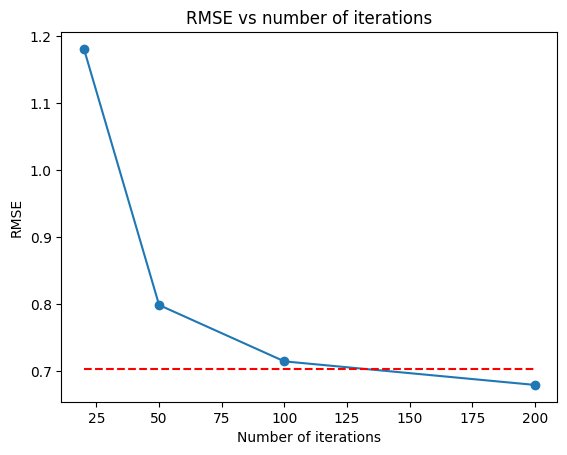

In [91]:
def const(x):
    return first_rmse

# Plot the RMSE
plt.plot(iter_array, rmse_final, '-o', label='RMSE')
plt.hlines(first_rmse, xmin=min(iter_array), xmax=max(iter_array), colors='r', linestyles='dashed')
plt.xlabel('Number of iterations') 
plt.ylabel('RMSE')
plt.title('RMSE vs number of iterations')
plt.savefig('ex3_rmse.png')
plt.show()